# Tutorial 4: Image Analysis

## Problem 1: Image Analysis

The sample data corresponds to the Sun. A way to analyse the solar activity is to study the sunspots. Sunspots are temporary phenomena on the Sun's photosphere that appear as spots darker than the surrounding areas. They are regions of reduced surface temperature caused by concentrations of magnetic field flux that inhibit convection. Sunspots usually appear in pairs of opposite magnetic polarity. Their number varies according to the solar cycle.

The provided datafile contains an image of the Sun in FITS format. Your task is:

1. Read the data from the FITS file and select the image data. 

2. Plot the image data.

3. By visual inspection, identify regions that could contain sunspots, and isolate them.

4. Mask the resultant image to show only the sunspots.

5. Calculate the diameter and the area of the sunspots in pixels.

6. Use the pixel scale of the image to calculate the diameter and the area of the sunspots in kilometers.

7. Reapeat the same process for the sunspots you identified in the previous step. Then compute the average diameter of the sunspots in kilometers.

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# This library is is very useful for this purposes and for spectrum fitting.
from astropy.io import fits 

# For your homework you may consider not using this library. Since Prof. Wladimir 
# may not consider this when marking your assignments.
# But help me to make fancy plots, so I use it here.
import scienceplots as splt 

In [5]:
# Import the FITS file 
filename = "./data/sunspots-image-data.fits"

In [6]:
# Open the file 
data_full = fits.open(filename)

# Get the header and the data 
h = data_full[1].header
d = data_full[1].data

In [7]:
h.keys

<bound method Header.keys of SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                 4096 / length of original image axis                  
NAXIS2  =                 4096 / length of original image axis                  
BLD_VERS= 'V9R5X   '           / Build Version: from jsoc_version.h             
LVL_NUM =                   1. / LVL_NUM data level number                      
T_REC   = '2024-03-26T23:59:52.000' / [ISO] Slotted observation time            
TRECSTEP=                   1. / [second] T_REC step {T_REC_step}               
TRECEPOC= '1977.01.01_00:00:00.000_TAI' / [TAI]                                 
TRECROUN=                    1 / center of slot {T_REC_round}                   
ORIGIN  = 'SDO/JSOC-SDP'       / ORIGIN Location where file made                

/tmp/ipykernel_142325/3899790347.py:3: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(d), cmap = "Oranges_r")
/tmp/ipykernel_142325/3899790347.py:3: RuntimeWarning: invalid value encountered in log10
  ax.imshow(np.log10(d), cmap = "Oranges_r")
/tmp/ipykernel_142325/3899790347.py:4: RuntimeWarning: divide by zero encountered in log10
  cb = plt.colorbar(ax.imshow(np.log10(d), cmap = "Oranges_r"))
/tmp/ipykernel_142325/3899790347.py:4: RuntimeWarning: invalid value encountered in log10
  cb = plt.colorbar(ax.imshow(np.log10(d), cmap = "Oranges_r"))


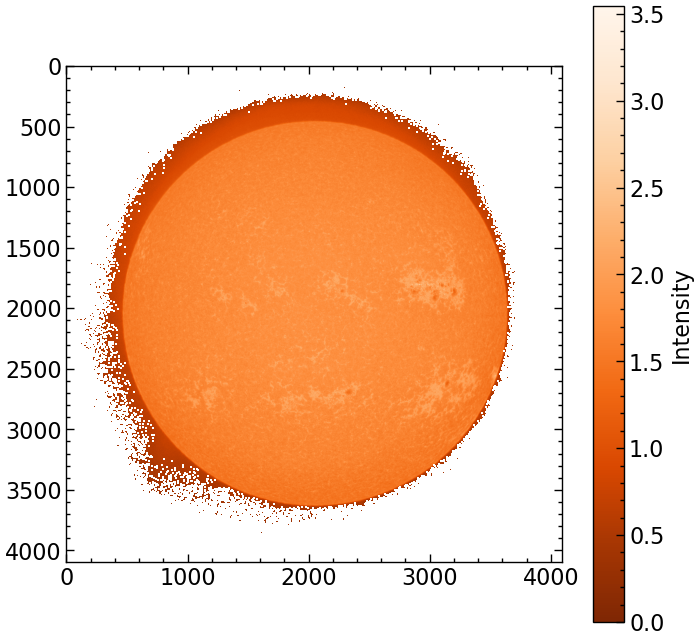

In [11]:
with plt.style.context(["science", "notebook"]):
    fig, ax = plt.subplots(figsize = (8, 8))
    ax.imshow(np.log10(d), cmap = "Oranges_r")
    cb = plt.colorbar(ax.imshow(np.log10(d), cmap = "Oranges_r"))
    cb.set_label("Intensity")
    
    plt.show()

In [70]:
# Isolate the sunspots 
# You will need to set the appropriate values so you can successfully 
# isolate the sunspots. 
# In this case, I will use the following values.
# Note that the first 2 values correspond to the y-axis and the other 2 correspond 
# to the x-axis.

sunspot1 = np.log10(d[2400:2900, 2100:2600])
sunspot2 = np.log10(d[1700:2000, 2100:2400])
sunspot3 = np.log10(d[2500:2800, 3000:3400])
sunspot4 = np.log10(d[1700:2000, 2700:3000])

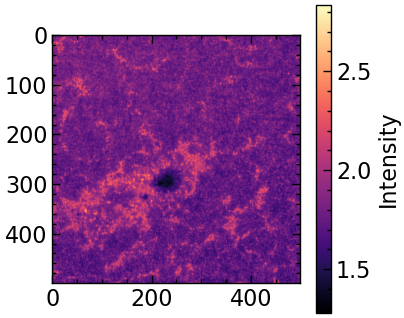

In [71]:
# Make a plot of the first sunspot so we can be sure that we have isolated it correctly.
with plt.style.context(["science", "notebook"]):
    fig, ax = plt.subplots(figsize = (4, 4))
    ax.imshow(sunspot1, cmap = "Oranges_r")
    cb = plt.colorbar(ax.imshow(sunspot1, cmap = "magma"))
    cb.set_label("Intensity")
    
    plt.show()

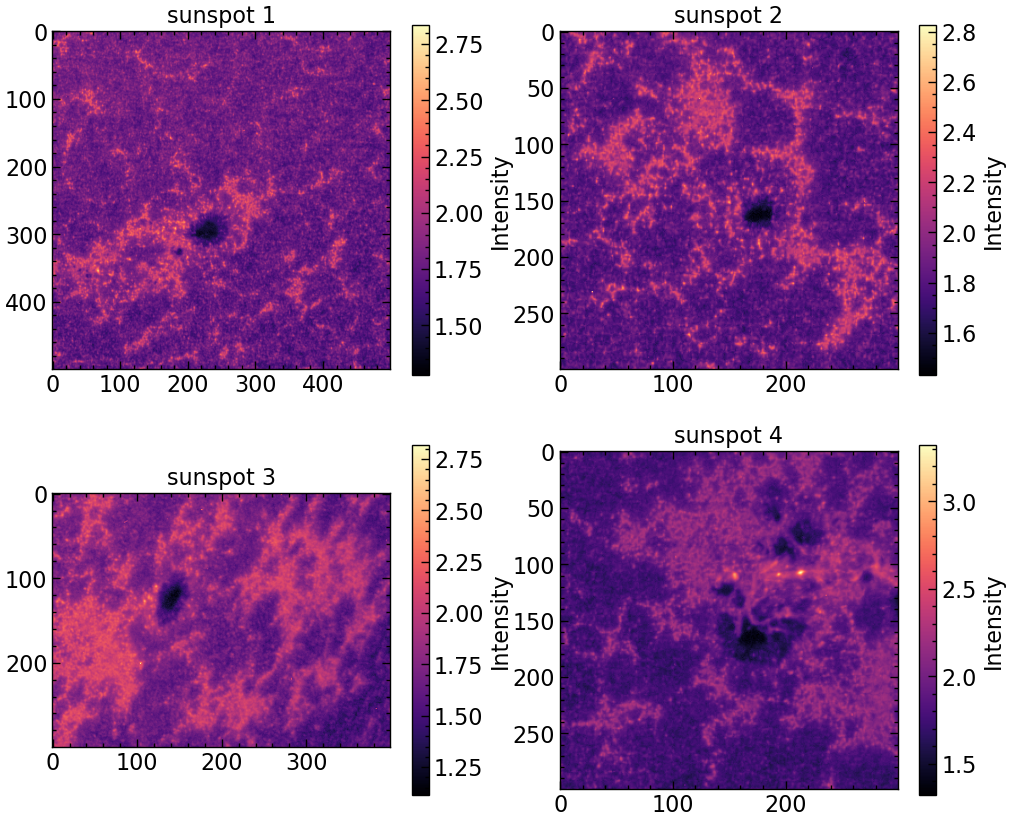

In [72]:
# Here we can make a 4-panel plot showing the 4 sunspots.
with plt.style.context(["science", "notebook"]):
    fig, ax = plt.subplots(2, 2,figsize = (12, 10))
    
    ax[0, 0].imshow(sunspot1, cmap = "magma")
    ax[0, 0].set_title("sunspot 1")
    cb1 = plt.colorbar(ax[0, 0].imshow(sunspot1, cmap = "magma"))
    cb1.set_label("Intensity")
    
    ax[0, 1].imshow(sunspot2, cmap = "magma")
    ax[0, 1].set_title("sunspot 2")
    cb2 = plt.colorbar(ax[0, 1].imshow(sunspot2, cmap = "magma"))
    cb2.set_label("Intensity")
    
    ax[1, 0].imshow(sunspot3, cmap = "magma")
    ax[1, 0].set_title("sunspot 3")
    cb3 = plt.colorbar(ax[1, 0].imshow(sunspot3, cmap = "magma"))
    cb3.set_label("Intensity")
    
    ax[1, 1].imshow(sunspot4, cmap = "magma")
    ax[1, 1].set_title("sunspot 4")
    cb4 = plt.colorbar(ax[1,1].imshow(sunspot4, cmap = "magma"))
    cb4.set_label("Intensity")
    
    plt.subplots_adjust(right = 0.9)
    plt.show()
    

In [74]:
# Define the threshold value 
# You must set this value based on the scale of the colorbar, and considering 
# the values that you want to keep or discard.
threshold1 = 1.56
threshold2 = 1.65
threshold3 = 1.37
threshold4 = 1.52

# Isolate the sunspots 
# The criteria here depends on the type of analysis you want to perform.
# In this case, using nan values is suitable for out analysis.
sunspot1_no_background = np.where(sunspot1 < threshold1, sunspot1, np.nan)
sunspot2_no_background = np.where(sunspot2 < threshold2, sunspot2, np.nan)
sunspot3_no_background = np.where(sunspot3 < threshold3, sunspot3, np.nan)
sunspot4_no_background = np.where(sunspot4 < threshold4, sunspot4, np.nan)


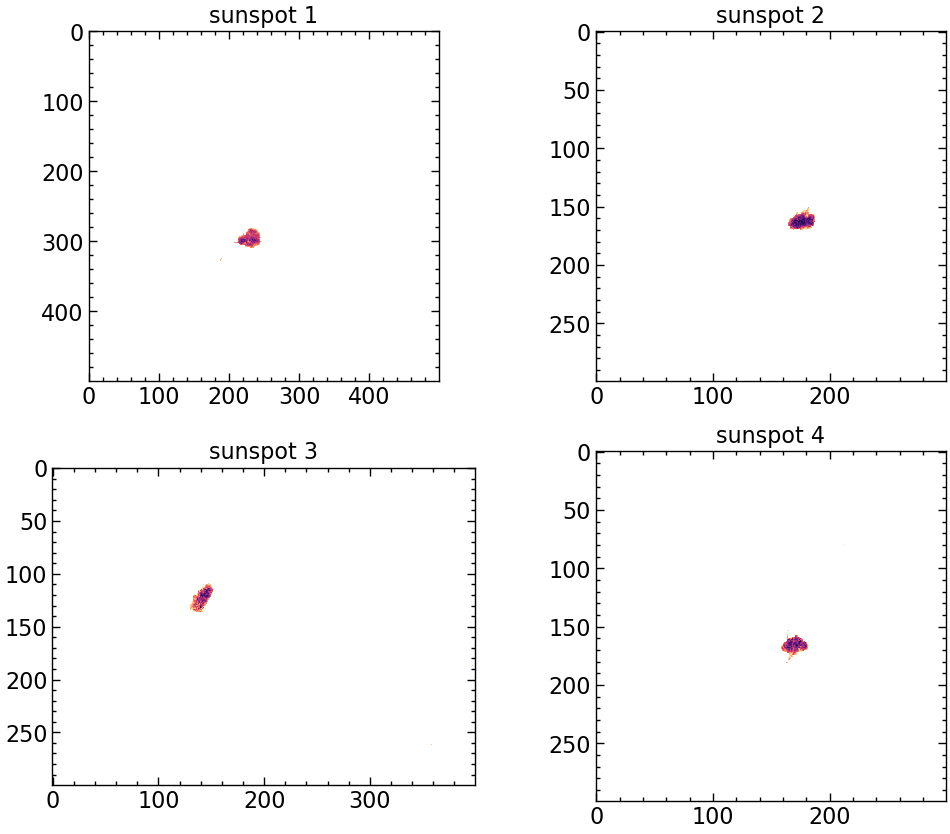

In [75]:
# Plot the sunspots images without the background.
with plt.style.context(["science", "notebook"]):
    fig, ax = plt.subplots(2, 2,figsize = (12, 10))
    
    ax[0, 0].imshow(sunspot1_no_background, cmap = "magma")
    ax[0, 0].set_title("sunspot 1")

    ax[0, 1].imshow(sunspot2_no_background, cmap = "magma")
    ax[0, 1].set_title("sunspot 2")

    ax[1, 0].imshow(sunspot3_no_background, cmap = "magma")
    ax[1, 0].set_title("sunspot 3")

    ax[1, 1].imshow(sunspot4_no_background, cmap = "magma")
    ax[1, 1].set_title("sunspot 4")
    
    plt.subplots_adjust(right = 0.9)
    plt.show()

In [76]:
# histogram. 
# Maybe it is not asked in the task, but is advisable to include it so 
# your analysis looks more professional. 
# First we need to flatten the sunspots
sunspot1_flat = sunspot1.reshape(sunspot1.size, 1)
sunspot2_flat = sunspot2.reshape(sunspot2.size, 1)
sunspot3_flat = sunspot3.reshape(sunspot3.size, 1)
sunspot4_flat = sunspot4.reshape(sunspot4.size, 1)

# Now we need to flatten the sunspots without background
sunspot1_no_background_flat = sunspot1_no_background.reshape(sunspot1_no_background.size, 1)
sunspot2_no_background_flat = sunspot2_no_background.reshape(sunspot2_no_background.size, 1)
sunspot3_no_background_flat = sunspot3_no_background.reshape(sunspot3_no_background.size, 1)
sunspot4_no_background_flat = sunspot4_no_background.reshape(sunspot4_no_background.size, 1)

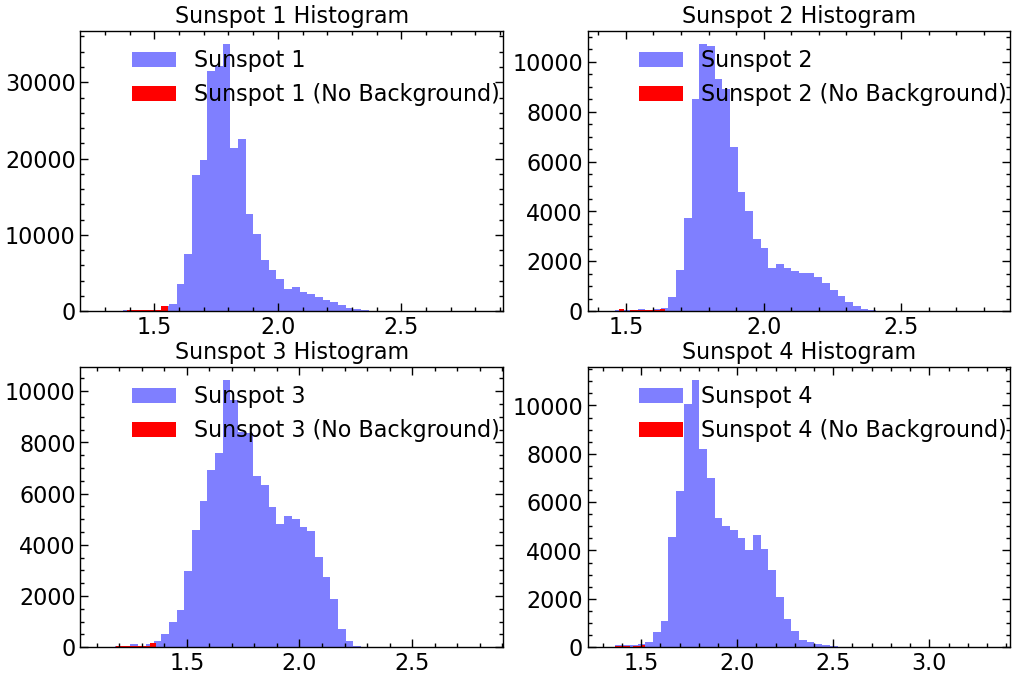

In [77]:
# Make the histograms
with plt.style.context(['science', 'notebook']):

    fig, ax = plt.subplots(2, 2, figsize = (12, 8))

    ax[0, 0].hist(sunspot1_flat, bins = 50, color = "blue", alpha = 0.5, label = "Sunspot 1")
    ax[0, 0].hist(sunspot1_no_background_flat, bins = 10, color = "red", label = "Sunspot 1 (No Background)")
    ax[0, 0].set_title("Sunspot 1 Histogram")
    ax[0, 0].legend(loc = [0.1, 0.7])

    ax[0, 1].hist(sunspot2_flat, bins = 50, color = "blue", alpha = 0.5, label = "Sunspot 2")
    ax[0, 1].hist(sunspot2_no_background_flat, bins = 10, color = "red", label = "Sunspot 2 (No Background)")
    ax[0, 1].set_title("Sunspot 2 Histogram")
    ax[0, 1].legend(loc = [0.1, 0.7])

    ax[1, 0].hist(sunspot3_flat, bins = 50, color = "blue", alpha = 0.5, label = "Sunspot 3")
    ax[1, 0].hist(sunspot3_no_background_flat, bins = 10, color = "red", label = "Sunspot 3 (No Background)")
    ax[1, 0].set_title("Sunspot 3 Histogram")
    ax[1, 0].legend(loc = [0.1, 0.7])

    ax[1, 1].hist(sunspot4_flat, bins = 50, color = "blue", alpha = 0.5, label = "Sunspot 4")
    ax[1, 1].hist(sunspot4_no_background_flat, bins = 10, color = "red", label = "Sunspot 4 (No Background)")
    ax[1, 1].set_title("Sunspot 4 Histogram")
    ax[1, 1].legend(loc = [0.1, 0.7])
    
    plt.show()

In [78]:
# Count the pixels of each sunspot, with this values later we will compute the area 
# of each sunspot.
pixels_sunspot1 = np.sum(~np.isnan(sunspot1_no_background))
pixels_sunspot2 = np.sum(~np.isnan(sunspot2_no_background))
pixels_sunspot3 = np.sum(~np.isnan(sunspot3_no_background))
pixels_sunspot4 = np.sum(~np.isnan(sunspot4_no_background))

In [79]:
# print the number of pixels
print(f"Sunspot 1 has {pixels_sunspot1} pixels")
print(f"Sunspot 2 has {pixels_sunspot2} pixels")
print(f"Sunspot 3 has {pixels_sunspot3} pixels")
print(f"Sunspot 4 has {pixels_sunspot4} pixels")


Sunspot 1 has 1422 pixels
Sunspot 2 has 414 pixels
Sunspot 3 has 510 pixels
Sunspot 4 has 407 pixels


In [81]:
# Now, we need to get the horizontal width of the sunspot
# Here we are taking the mid horizontal width of the sunspots. 
# But you may consider using a different criteria to compute the diameter of the sunspots
sunspot1_horizontal = np.sum(~np.isnan(sunspot1_no_background[290,:]))
print(f"Sunspot 1 has a horizontal width of {sunspot1_horizontal} pixels")

sunspot2_horizontal = np.sum(~np.isnan(sunspot2_no_background[163,:]))
print(f"Sunspot 2 has a horizontal width of {sunspot2_horizontal} pixels")

sunspot3_horizontal = np.sum(~np.isnan(sunspot3_no_background[120,:]))
print(f"Sunspot 3 has a horizontal width of {sunspot3_horizontal} pixels")

sunspot4_horizontal = np.sum(~np.isnan(sunspot4_no_background[168,:]))
print(f"Sunspot 4 has a horizontal width of {sunspot4_horizontal} pixels")

Sunspot 1 has a horizontal width of 33 pixels
Sunspot 2 has a horizontal width of 24 pixels
Sunspot 3 has a horizontal width of 19 pixels
Sunspot 4 has a horizontal width of 24 pixels


In [84]:
# Obtain the scale of one pixel 
scale = h["CDELT1"]
print(f"The scale of a pixel is {scale} arcsec")

The scale of a pixel is 0.609372973 arcsec


In [85]:
# Define the pixel scale
pixel_scale = scale # arcsec/pixel

# distance to the sun in km
distance_to_sun = 1.496e8 # km

# Radius of the earth in km
radius_earth = 6371 # km

# pixel scale in degrees
pixel_deg = pixel_scale / 3600 # degrees

# arcsec to length in km in the sun
pixel_to_km = distance_to_sun * np.sin(np.deg2rad(pixel_deg)) # km


In [86]:
# Compute the diameter of the sunspots
diameter_sunspot1 = sunspot1_horizontal * pixel_to_km
diameter_sunspot2 = sunspot2_horizontal * pixel_to_km
diameter_sunspot3 = sunspot3_horizontal * pixel_to_km
diameter_sunspot4 = sunspot4_horizontal * pixel_to_km

# compute the area of the sunspots
area_sunspot1 = pixels_sunspot1 * pixel_to_km**2
area_sunspot2 = pixels_sunspot2 * pixel_to_km**2
area_sunspot3 = pixels_sunspot3 * pixel_to_km**2
area_sunspot4 = pixels_sunspot4 * pixel_to_km**2

In [87]:
# Print in a fancy way the results (use latex)
print(f"Sunspot 1 has a diameter of {diameter_sunspot1:.2f} km and an area of {area_sunspot1:.2f} km^2")
print(f"Sunspot 2 has a diameter of {diameter_sunspot2:.2f} km and an area of {area_sunspot2:.2f} km^2")
print(f"Sunspot 3 has a diameter of {diameter_sunspot3:.2f} km and an area of {area_sunspot3:.2f} km^2")
print(f"Sunspot 4 has a diameter of {diameter_sunspot4:.2f} km and an area of {area_sunspot4:.2f} km^2")

Sunspot 1 has a diameter of 14584.90 km and an area of 277765877.96 km^2
Sunspot 2 has a diameter of 10607.20 km and an area of 80868546.75 km^2
Sunspot 3 has a diameter of 8397.37 km and an area of 99620673.53 km^2
Sunspot 4 has a diameter of 10607.20 km and an area of 79501204.17 km^2


In [88]:
# Data of the earth
print(f"The diameter of the earth is {2*radius_earth:.2f} km")
print(f"The area of the earth is {np.pi*radius_earth**2:.2f} km^2")

The diameter of the earth is 12742.00 km
The area of the earth is 127516117.98 km^2


In [89]:
# Now compute the average diameter and area of the sunspots
average_diameter = np.mean([diameter_sunspot1, diameter_sunspot2, diameter_sunspot3, diameter_sunspot4])
average_area = np.mean([area_sunspot1, area_sunspot2, area_sunspot3, area_sunspot4])

print(f"The average diameter of the sunspots is {average_diameter:.2f} km")
print(f"The average area of the sunspots is {average_area:.2f} km^2")

The average diameter of the sunspots is 11049.17 km
The average area of the sunspots is 134439075.60 km^2


In [ ]:
# Finally, you may need to include the comparison between the data of the earth and the 
# data obtained from the sunspots. 
